### Q2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

## a.

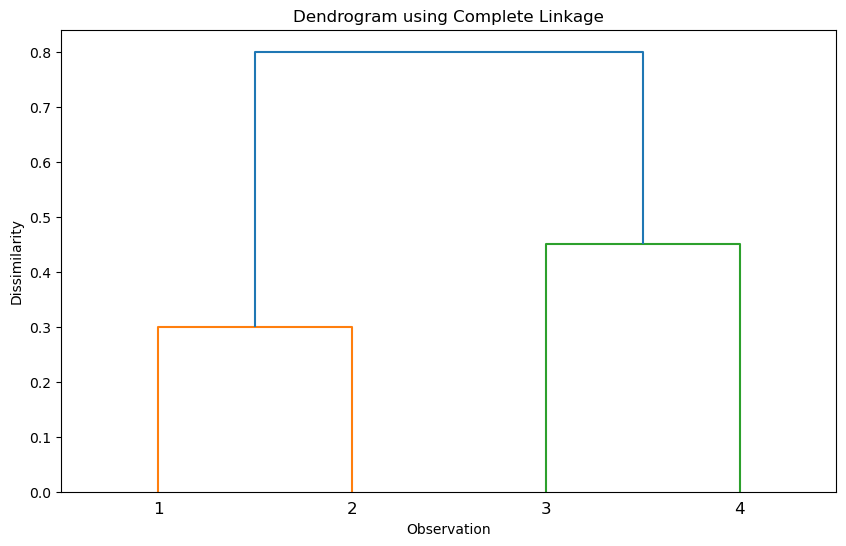

In [14]:
import numpy as np
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform

# Define the dissimilarity matrix
dissimilarity_matrix = np.array([
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
])

# Convert the square matrix to condensed form
condensed_dissimilarity = squareform(dissimilarity_matrix)

# Perform hierarchical clustering using complete linkage
Z_complete = linkage(condensed_dissimilarity, 'complete')

# Plot dendrograms for complete linkage
plt.figure(figsize=(10, 6))
plt.title('Dendrogram using Complete Linkage')
dendrogram(Z_complete, labels=['1', '2', '3', '4'])
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()

## b.

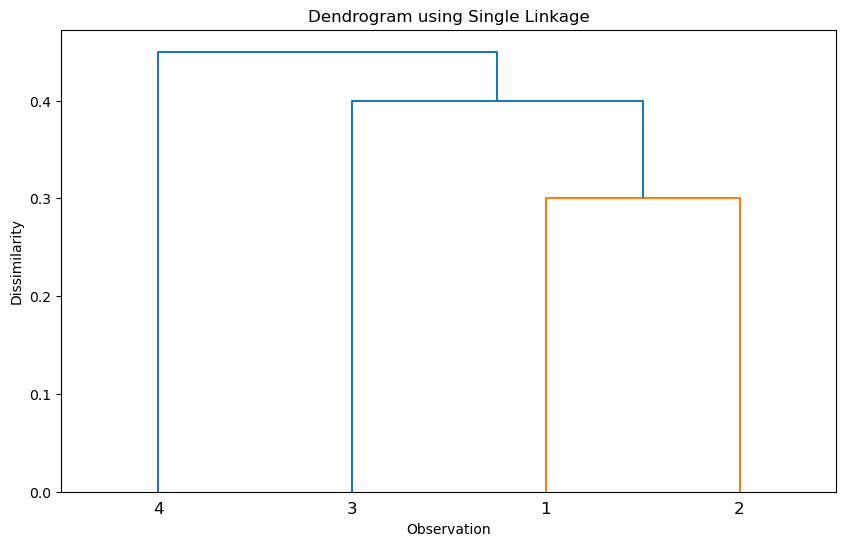

In [16]:
# Perform hierarchical clustering using single linkage
Z_single = linkage(condensed_dissimilarity, 'single')

# Plot dendrograms for single linkage
plt.figure(figsize=(10, 6))
plt.title('Dendrogram using Single Linkage')
dendrogram(Z_single, labels=['1', '2', '3', '4'])
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()

## c.

### Cluster 1: {1,2}
### Cluster 2: {3,4}

## d.

### Cluster 1: {1,2,3}
### Cluster 2: {4}

## e.

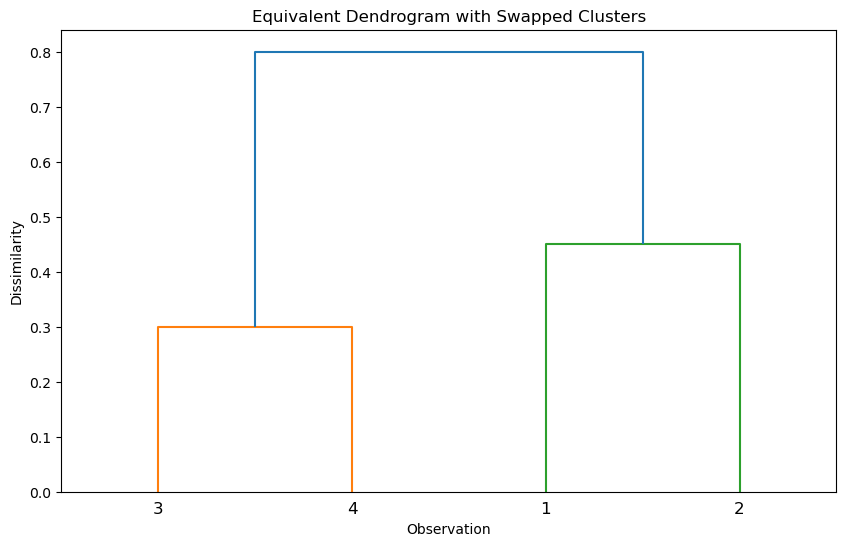

In [20]:
# Plot dendrograms for complete linkage
plt.figure(figsize=(10, 6))
plt.title('Equivalent Dendrogram with Swapped Clusters')
dendrogram(Z_complete, labels=['3', '4','1', '2'])
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')
plt.show()

## Q3

## a.

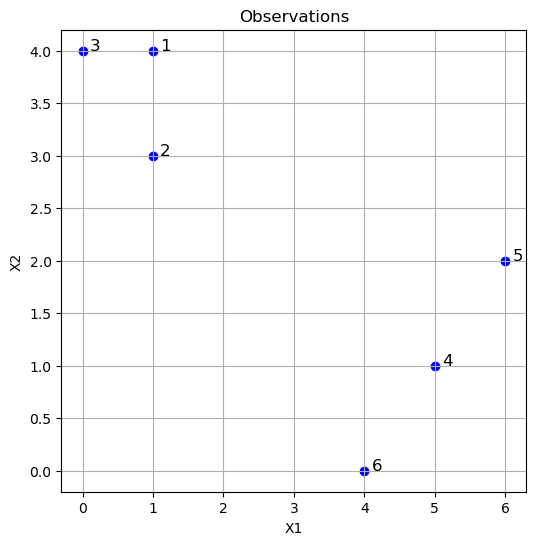

In [27]:
# Data for the observations
observations = np.array([
    [1, 4],
    [1, 3],
    [0, 4],
    [5, 1],
    [6, 2],
    [4, 0]
])


# Plot the observations
plt.figure(figsize=(6, 6))
plt.scatter(observations[:, 0], observations[:, 1], color='blue')

for i in range(observations.shape[0]):
    plt.text(observations[i, 0] + 0.1, observations[i, 1], f'{i+1}', fontsize=12)
plt.title('Observations')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

## b.

In [28]:
# Randomly assign a cluster label to each observation
np.random.seed(42)  # For reproducibility
cluster_labels = np.random.choice([1, 2], size=observations.shape[0])
print(f'Initial random cluster labels: {cluster_labels}')

Initial random cluster labels: [1 2 1 1 1 2]


## c.

In [29]:
# Compute the centroid for each cluster
def compute_centroids(observations, labels, k=2):
    centroids = np.zeros((k, observations.shape[1]))
    for i in range(1, k+1):
        centroids[i-1] = np.mean(observations[labels == i], axis=0)
    return centroids

centroids = compute_centroids(observations, cluster_labels)
print(f'Initial centroids:\n{centroids}')

Initial centroids:
[[3.   2.75]
 [2.5  1.5 ]]


## d.

In [30]:
# Assign each observation to the closest centroid
def assign_clusters(observations, centroids):
    distances = np.linalg.norm(observations[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1) + 1  # +1 to match cluster labels starting from 1

new_labels = assign_clusters(observations, centroids)
print(f'New cluster labels after reassignment: {new_labels}')

New cluster labels after reassignment: [1 1 1 2 1 2]


## e.

In [31]:
# Repeat until cluster assignments stop changing
while not np.array_equal(cluster_labels, new_labels):
    cluster_labels = new_labels
    centroids = compute_centroids(observations, cluster_labels)
    new_labels = assign_clusters(observations, centroids)
    print(f'Updated centroids:\n{centroids}')
    print(f'Updated cluster labels: {new_labels}')

# Final cluster labels and centroids
print(f'Final cluster labels: {new_labels}')
print(f'Final centroids:\n{centroids}')

Updated centroids:
[[2.   3.25]
 [4.5  0.5 ]]
Updated cluster labels: [1 1 1 2 2 2]
Updated centroids:
[[0.66666667 3.66666667]
 [5.         1.        ]]
Updated cluster labels: [1 1 1 2 2 2]
Final cluster labels: [1 1 1 2 2 2]
Final centroids:
[[0.66666667 3.66666667]
 [5.         1.        ]]


## f.

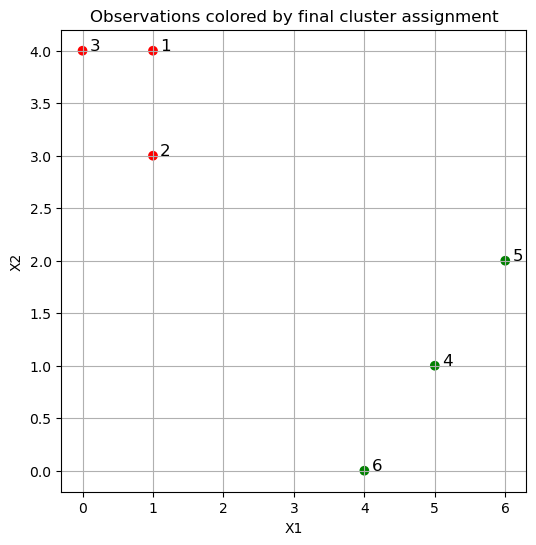

In [32]:
# Plot the final clusters with color
plt.figure(figsize=(6, 6))
colors = ['red' if label == 1 else 'green' for label in new_labels]
plt.scatter(observations[:, 0], observations[:, 1], color=colors)
for i in range(observations.shape[0]):
    plt.text(observations[i, 0] + 0.1, observations[i, 1], f'{i+1}', fontsize=12)
plt.title('Observations colored by final cluster assignment')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()